## Import and Download


In [25]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [26]:
import sys 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [27]:
sys.path.insert(1, '/content/drive/MyDrive/tabular_project')
!unzip '/content/drive/MyDrive/tabular_project/house-prices.zip' -d '/content/house-prices'

Archive:  /content/drive/MyDrive/tabular_project/house-prices.zip
replace /content/house-prices/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/house-prices/data_description.txt  
  inflating: /content/house-prices/sample_submission.csv  
  inflating: /content/house-prices/test.csv  
  inflating: /content/house-prices/train.csv  


In [28]:
train=pd.read_csv('/content/house-prices/train.csv', index_col=False)


## Helper Functions

In [77]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [78]:
import math
def createDic(list_str):
  dic = {}
  counter = 0
  for i in list_str:
    # print(type(i))
    if isinstance(i, (float)) and math.isnan(i):
      # print("nan")
      dic[i] = np.NaN
    else:
      dic[i] = counter
      counter+=1
  return dic

## Analyzing and PreProcessing

Here where are changing some nan value that actually have a meaning to be nan.
NA entries in the column Alley actually mean "No alley access" 
<br>
NA entries in the column BsmtQual actually mean "no basement" 
<br>
And so on.

In [79]:
train['Alley'] = train['Alley'].replace(np.NaN, "No alley access")
# test['Alley'] = test['Alley'].replace(np.NaN, "No alley access")
train['BsmtQual'] = train['BsmtQual'].replace(np.NaN, "No basement")
# test['BsmtQual'] = test['BsmtQual'].replace(np.NaN, "No basement")

train['BsmtCond'] = train['BsmtCond'].replace(np.NaN, "No basement")
# test['BsmtCond'] = test['BsmtCond'].replace(np.NaN, "No basement")

train['BsmtExposure'] = train['BsmtExposure'].replace(np.NaN, "No basement")
# test['BsmtExposure'] = test['BsmtExposure'].replace(np.NaN, "No basement")
train['BsmtFinType1'] = train['BsmtFinType1'].replace(np.NaN, "No basement")
# test['BsmtFinType1'] = test['BsmtFinType1'].replace(np.NaN, "No basement")
train['BsmtFinType2'] = train['BsmtFinType2'].replace(np.NaN, "No basement")
# test['BsmtFinType2'] = test['BsmtFinType2'].replace(np.NaN, "No basement")

train['FireplaceQu'] = train['FireplaceQu'].replace(np.NaN, "No fireplace")
# test['FireplaceQu'] = test['FireplaceQu'].replace(np.NaN, "No fireplace")

train['GarageType'] = train['GarageType'].replace(np.NaN, "No garage")
# test['GarageType'] = test['GarageType'].replace(np.NaN, "No garage")

train['GarageFinish'] = train['GarageFinish'].replace(np.NaN, "No garage")
# test['GarageFinish'] = test['GarageFinish'].replace(np.NaN, "No garage")
train['GarageQual'] = train['GarageQual'].replace(np.NaN, "No garage")
# test['GarageQual'] = test['GarageQual'].replace(np.NaN, "No garage")
train['GarageCond'] = train['GarageCond'].replace(np.NaN, "No garage")
# test['GarageCond'] = test['GarageCond'].replace(np.NaN, "No garage")

train['PoolQC'] = train['PoolQC'].replace(np.NaN, "No pool")
# test['PoolQC'] = test['PoolQC'].replace(np.NaN,"No pool")
train['Fence'] = train['Fence'].replace(np.NaN,"No fence")
# test['Fence'] = test['Fence'].replace(np.NaN, "No fence")
train['MiscFeature'] = train['MiscFeature'].replace(np.NaN, "None")
# test['MiscFeature'] = test['MiscFeature'].replace(np.NaN, "None")


##Split Data to train and test

In [80]:
trainFull = train.copy()
train, test = train_test_split(
                            train, random_state=42, test_size=.33)

In [81]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
train["PoolArea"].head(200)

Training data shape:  (655, 81)
Testing data shape:  (323, 81)


1188    0
536     0
262     0
1151    0
1180    0
       ..
714     0
396     0
224     0
476     0
62      0
Name: PoolArea, Length: 200, dtype: int64

In [82]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,123,18.8
GarageYrBlt,38,5.8
MasVnrType,1,0.2
MasVnrArea,1,0.2
Electrical,1,0.2


In [83]:
missing_values_table(test)


Your selected dataframe has 81 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,60,18.6
GarageYrBlt,15,4.6
MasVnrType,1,0.3
MasVnrArea,1,0.3


# Treat Missings Values

## Deleting Rows / Listwise Deletion

Delete all row with missing values

In [84]:
train_delete_row = train.copy()
test_delete_row = test.copy()
numeric_features = train_delete_row.select_dtypes(exclude=[np.number])
for i in numeric_features:
  dic = createDic(train_delete_row[i].unique())
  # print(dic)
  # print(train_delete_row[i].unique())
  train_delete_row[i] = train_delete_row[i].map(dic)
  # print(train_delete_row[i])
missing_values_table(train_delete_row)
train_delete_row.dropna(inplace=True)
train_delete_row.isnull().sum()

numeric_features_test = test_delete_row.select_dtypes(exclude=[np.number])
for i in numeric_features_test:
  dic = createDic(test_delete_row[i].unique())
  # print(dic)
  # print(test_delete_row[i].unique())
  test_delete_row[i] = test_delete_row[i].map(dic)
  # print(test_delete_row[i])
missing_values_table(test_delete_row)
test_delete_row.dropna(inplace=True)
test_delete_row.isnull().sum()


Your selected dataframe has 81 columns.
There are 5 columns that have missing values.
Your selected dataframe has 81 columns.
There are 4 columns that have missing values.


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [85]:

# train_delete_row.to_csv('house-prices/deletedRows.csv', index=False)
# train_delete_row

## Replacing With Mean

In [86]:
def filter1(dataset):
    for col in dataset.columns:
        #print(dataset[col].dtypes)
        if dataset[col].dtypes=='object':
            dataset[col].fillna(dataset[col].mode()[0],inplace=True)
        elif dataset[col].dtypes=='int64' or dataset[col].dtypes=='float64':
            dataset[col].fillna(dataset[col].mean(),inplace=True)            

    return dataset

In [87]:
train_mean = train.copy()
test_mean= test.copy()
train_mean = filter1(train_mean)
test_mean = filter1(test_mean)
# train_mean


In [88]:
missing_values_table(train_mean)

Your selected dataframe has 81 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [89]:
numeric_features = train_mean.select_dtypes(exclude=[np.number])
for i in numeric_features:
  dic = createDic(train_mean[i].unique())
  # print(dic)
  # print(train_mean[i].unique())
  train_mean[i] = train_mean[i].map(dic)
  # print(train_mean[i])

numeric_features_test = test_mean.select_dtypes(exclude=[np.number])
for i in numeric_features_test:
  dic = createDic(test_mean[i].unique())
  # print(dic)
  # print(test_mean[i].unique())
  test_mean[i] = test_mean[i].map(dic)
  # print(test_mean[i])



In [90]:
train_mean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1188,1189,60,0,68.000000,8935,0,0,0,0,0,...,0,0,0,0,0,7,2009,0,0,195000
536,537,60,0,57.000000,8924,0,0,0,0,0,...,0,0,0,0,0,7,2008,0,0,188000
262,263,80,0,88.000000,8471,0,0,0,0,0,...,0,0,1,0,0,7,2006,0,0,151000
1151,1152,20,0,134.000000,17755,0,0,1,0,0,...,0,0,0,0,0,11,2006,0,0,149900
1180,1181,60,0,70.281955,11170,0,0,2,0,0,...,0,0,2,0,0,4,2006,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,757,60,0,68.000000,10769,0,0,0,0,0,...,0,0,0,0,0,4,2009,0,0,212000
436,437,50,2,40.000000,4400,0,0,1,0,0,...,0,0,0,0,0,10,2006,0,0,116000
1071,1072,60,0,78.000000,11700,0,0,1,0,0,...,0,0,0,0,0,5,2009,0,0,154000
1219,1220,160,2,21.000000,1680,0,0,1,0,0,...,0,0,0,0,0,4,2006,0,1,91500


In [91]:
# train_mean.to_csv('house-prices/mean.csv', index=False)
# train_mean

## Assigning An Unique Category

In [92]:
train_unique_categ = train.copy()
test_unique_categ = test.copy()
missing_values_table(train_unique_categ)


Your selected dataframe has 81 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,123,18.8
GarageYrBlt,38,5.8
MasVnrType,1,0.2
MasVnrArea,1,0.2
Electrical,1,0.2


In [93]:
print(train_unique_categ.Electrical.unique())
print(test_unique_categ.Electrical.unique())

['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan]
['SBrkr' 'FuseA' 'FuseF' 'FuseP']


Some of the missing values cannot be reasonably estimated (e.g. the year in which the garage of a house was built). Such missing values are replaced by a numeric but non-sensical value such as -9999

In [94]:

train_unique_categ['GarageYrBlt'] = train_unique_categ['GarageYrBlt'].fillna(-9999)
train_unique_categ['MasVnrArea'] = train_unique_categ['MasVnrArea'].fillna(-9999)
train_unique_categ['LotFrontage'] = train_unique_categ['LotFrontage'].fillna(-9999)

test_unique_categ['GarageYrBlt'] = test_unique_categ['GarageYrBlt'].fillna(-9999)
test_unique_categ['MasVnrArea'] = test_unique_categ['MasVnrArea'].fillna(-9999)
test_unique_categ['LotFrontage'] = test_unique_categ['LotFrontage'].fillna(-9999)

In [95]:
train_unique_categ['MasVnrType'] = train_unique_categ['MasVnrType'].fillna("U")
train_unique_categ['MasVnrType'] = train_unique_categ['MasVnrType'].map({"BrkFace": 1, "Stone": 2, "BrkCmn": 3, "None": 0,  "U": 4})
train_unique_categ['Electrical'] = train_unique_categ['Electrical'].fillna("U")
train_unique_categ['Electrical'] = train_unique_categ['Electrical'].map({"SBrkr": 1, "FuseF": 2, "FuseA": 3, "None": 0,"FuseP":4,  "Mix": 5,  "U": 6})
missing_values_table(train_unique_categ)

Your selected dataframe has 81 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [96]:
test_unique_categ['MasVnrType'] = test_unique_categ['MasVnrType'].fillna("U")
test_unique_categ['MasVnrType'] = test_unique_categ['MasVnrType'].map({"BrkFace": 1, "Stone": 2, "BrkCmn": 3, "None": 0,  "U": 4})
test_unique_categ['Electrical'] = test_unique_categ['Electrical'].fillna("U")
test_unique_categ['Electrical'] = test_unique_categ['Electrical'].map({"SBrkr": 1, "FuseF": 2, "FuseA": 3, "None": 0,"FuseP":4,  "Mix": 5,  "U": 6})
missing_values_table(test_unique_categ)

Your selected dataframe has 81 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [97]:
numeric_features = train_unique_categ.select_dtypes(exclude=[np.number])
for i in numeric_features:
  dic = createDic(train_unique_categ[i].unique())
  # print(dic)
  # print(train_unique_categ[i].unique())
  train_unique_categ[i] = train_unique_categ[i].map(dic)
  # print(train_unique_categ[i])


numeric_features_test = test_unique_categ.select_dtypes(exclude=[np.number])
for i in numeric_features_test:
  dic = createDic(test_unique_categ[i].unique())
  # print(dic)
  # print(test_unique_categ[i].unique())
  test_unique_categ[i] = test_unique_categ[i].map(dic)
  # print(test_unique_categ[i])

In [98]:
train_unique_categ

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1188,1189,60,0,68.0,8935,0,0,0,0,0,...,0,0,0,0,0,7,2009,0,0,195000
536,537,60,0,57.0,8924,0,0,0,0,0,...,0,0,0,0,0,7,2008,0,0,188000
262,263,80,0,88.0,8471,0,0,0,0,0,...,0,0,1,0,0,7,2006,0,0,151000
1151,1152,20,0,134.0,17755,0,0,1,0,0,...,0,0,0,0,0,11,2006,0,0,149900
1180,1181,60,0,-9999.0,11170,0,0,2,0,0,...,0,0,2,0,0,4,2006,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,757,60,0,68.0,10769,0,0,0,0,0,...,0,0,0,0,0,4,2009,0,0,212000
436,437,50,2,40.0,4400,0,0,1,0,0,...,0,0,0,0,0,10,2006,0,0,116000
1071,1072,60,0,78.0,11700,0,0,1,0,0,...,0,0,0,0,0,5,2009,0,0,154000
1219,1220,160,2,21.0,1680,0,0,1,0,0,...,0,0,0,0,0,4,2006,0,1,91500


In [99]:
test_unique_categ

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
110,111,50,0,75.0,9525,0,0,0,0,0,...,0,0,0,0,0,10,2006,0,0,136900
1395,1396,60,0,88.0,12665,0,0,1,0,0,...,0,0,0,0,0,2,2007,0,0,281213
1230,1231,90,0,-9999.0,18890,0,0,1,0,0,...,0,0,0,1,8300,8,2007,0,0,190000
387,388,80,0,72.0,7200,0,0,0,0,0,...,0,0,1,0,0,10,2009,0,1,125000
1276,1277,60,0,-9999.0,12936,0,0,1,0,0,...,0,0,0,0,0,12,2009,0,0,162000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,970,190,0,75.0,10382,0,0,0,0,0,...,0,0,0,0,0,3,2006,4,0,140000
61,62,75,1,60.0,7200,0,0,0,0,0,...,0,0,0,0,0,3,2007,0,0,101000
728,729,90,0,85.0,11475,0,0,0,0,0,...,0,0,0,0,0,7,2009,2,1,110000
655,656,160,1,21.0,1680,0,0,0,0,0,...,0,0,0,0,0,3,2010,0,2,88000


## Using Algorithms Which Support Missing Values | KNN Imputer 5 nearest neighbours

In [100]:
train_knn = train.copy()
test_knn = test.copy()
train_knn_full = trainFull.copy()


In [101]:
train_knn['MasVnrType'] = train_knn['MasVnrType'].map({"BrkFace": 1, "Stone": 2, "BrkCmn": 3, "None": 0})
test_knn['MasVnrType'] = test_knn['MasVnrType'].map({"BrkFace": 1, "Stone": 2, "BrkCmn": 3, "None": 0})
train_knn_full['MasVnrType'] = train_knn_full['MasVnrType'].map({"BrkFace": 1, "Stone": 2, "BrkCmn": 3, "None": 0})
train_knn['Electrical'] = train_knn['Electrical'].map({"SBrkr": 1, "FuseF": 2, "FuseA": 3, "None": 0,"FuseP":4,  "Mix": 5,  "U": 6})
test_knn['Electrical'] = test_knn['Electrical'].map({"SBrkr": 1, "FuseF": 2, "FuseA": 3, "None": 0,"FuseP":4,  "Mix": 5,  "U": 6})
train_knn_full['Electrical'] = train_knn_full['Electrical'].map({"SBrkr": 1, "FuseF": 2, "FuseA": 3, "None": 0,"FuseP":4,  "Mix": 5,  "U": 6})


In [102]:
missing_values_table(train_knn)

Your selected dataframe has 81 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,123,18.8
GarageYrBlt,38,5.8
MasVnrType,1,0.2
MasVnrArea,1,0.2
Electrical,1,0.2


In [103]:
missing_values_table(test_knn)

Your selected dataframe has 81 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,60,18.6
GarageYrBlt,15,4.6
MasVnrType,1,0.3
MasVnrArea,1,0.3


In [104]:
train_knn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1188,1189,60,RL,68.0,8935,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,None,0,7,2009,WD,Normal,195000
536,537,60,RL,57.0,8924,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,None,0,7,2008,WD,Normal,188000
262,263,80,RL,88.0,8471,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,GdWo,None,0,7,2006,WD,Normal,151000
1151,1152,20,RL,134.0,17755,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,None,0,11,2006,WD,Normal,149900
1180,1181,60,RL,NaN,11170,Pave,No alley access,IR2,Lvl,AllPub,...,0,No pool,GdPrv,None,0,4,2006,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,757,60,RL,68.0,10769,Pave,No alley access,IR1,Lvl,AllPub,...,0,No pool,No fence,None,0,4,2009,WD,Normal,212000
436,437,50,RM,40.0,4400,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,None,0,10,2006,WD,Normal,116000
1071,1072,60,RL,78.0,11700,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,None,0,5,2009,WD,Normal,154000
1219,1220,160,RM,21.0,1680,Pave,No alley access,Reg,Lvl,AllPub,...,0,No pool,No fence,None,0,4,2006,WD,Abnorml,91500


In [105]:
numeric_features = train_knn.select_dtypes(exclude=[np.number])
for i in numeric_features:
  dic = createDic(train_knn[i].unique())
  # print(dic)
  # print(train_knn[i].unique())
  train_knn[i] = train_knn[i].map(dic)
  # print(train_knn[i])

numeric_features_test = test_knn.select_dtypes(exclude=[np.number])
for i in numeric_features_test:
  dic = createDic(test_knn[i].unique())
  # print(dic)
  # print(test_knn[i].unique())
  test_knn[i] = test_knn[i].map(dic)
  # print(test_knn[i])

numeric_features_full = train_knn_full.select_dtypes(exclude=[np.number])
for i in numeric_features_full:
  dic = createDic(train_knn_full[i].unique())
  # print(dic)
  # print(train_knn_full[i].unique())
  train_knn_full[i] = train_knn_full[i].map(dic)
  # print(train_knn_full[i])


In [106]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_knn = pd.DataFrame(scaler.fit_transform(train_knn), columns = train_knn.columns)
test_knn = pd.DataFrame(scaler.fit_transform(test_knn), columns = test_knn.columns)
train_knn_full = pd.DataFrame(scaler.fit_transform(train_knn_full), columns = train_knn_full.columns)
train_knn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.815374,0.235294,0.0,0.160959,0.034888,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.545455,0.75,0.0,0.0,0.271310
1,0.367879,0.235294,0.0,0.123288,0.034837,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.545455,0.50,0.0,0.0,0.259448
2,0.179822,0.352941,0.0,0.229452,0.032718,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.25,0.0,0.0,0.545455,0.00,0.0,0.0,0.196746
3,0.789979,0.000000,0.0,0.386986,0.076148,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.909091,0.00,0.0,0.0,0.194882
4,0.809883,0.235294,0.0,NaN,0.045344,0.0,0.0,0.666667,0.0,0.0,...,0.0,0.0,0.50,0.0,0.0,0.272727,0.00,0.0,0.0,0.364514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.518874,0.235294,0.0,0.160959,0.043468,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.272727,0.75,0.0,0.0,0.300119
651,0.299245,0.176471,0.5,0.065068,0.013674,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.818182,0.00,0.0,0.0,0.137434
652,0.735072,0.235294,0.0,0.195205,0.047823,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.363636,0.75,0.0,0.0,0.201830
653,0.836651,0.823529,0.5,0.000000,0.000950,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.272727,0.00,0.0,0.2,0.095916


In [107]:

imputer = KNNImputer(n_neighbors=5)
train_knn5 = pd.DataFrame(imputer.fit_transform(train_knn),columns = train_knn.columns)
test_knn5 = pd.DataFrame(imputer.fit_transform(test_knn),columns = test_knn.columns)
train_knn_full = pd.DataFrame(imputer.fit_transform(train_knn_full),columns = train_knn_full.columns)


In [108]:
train_knn5.isna().any()
test_knn5.isna().any()
train_knn_full.isna().any()
train_knn5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.815374,0.235294,0.0,0.160959,0.034888,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.545455,0.75,0.0,0.0,0.271310
1,0.367879,0.235294,0.0,0.123288,0.034837,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.545455,0.50,0.0,0.0,0.259448
2,0.179822,0.352941,0.0,0.229452,0.032718,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.25,0.0,0.0,0.545455,0.00,0.0,0.0,0.196746
3,0.789979,0.000000,0.0,0.386986,0.076148,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.909091,0.00,0.0,0.0,0.194882
4,0.809883,0.235294,0.0,0.189041,0.045344,0.0,0.0,0.666667,0.0,0.0,...,0.0,0.0,0.50,0.0,0.0,0.272727,0.00,0.0,0.0,0.364514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0.518874,0.235294,0.0,0.160959,0.043468,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.272727,0.75,0.0,0.0,0.300119
651,0.299245,0.176471,0.5,0.065068,0.013674,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.818182,0.00,0.0,0.0,0.137434
652,0.735072,0.235294,0.0,0.195205,0.047823,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.363636,0.75,0.0,0.0,0.201830
653,0.836651,0.823529,0.5,0.000000,0.000950,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.272727,0.00,0.0,0.2,0.095916


In [109]:
# train_knn5.to_csv('house-prices/knn.csv', index=False)
# train_knn5

# Accuracy

In [110]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

def model1(train_f):
  plt.style.use(style='ggplot')
  plt.rcParams['figure.figsize'] = (10, 6)
  y = np.log(train_f.SalePrice)
  X = train_f.drop(['SalePrice', 'Id'], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(
                            X, y, random_state=42, test_size=.33)
  lr = linear_model.LinearRegression()
  X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  model = lr.fit(X_train, y_train)
  print ("R^2 is: \n", model.score(X_test, y_test))
  predictions = model.predict(X_test)
  print ('RMSE is: \n', mean_squared_error(y_test, predictions))
  actual_values = y_test
  plt.scatter(predictions, actual_values, alpha=.7,
              color='b') #alpha helps to show overlapping data
  plt.xlabel('Predicted Price')
  plt.ylabel('Actual Price')
  plt.title('Linear Regression Model')
  plt.show()

def model2(train_f, test_f):
  plt.style.use(style='ggplot')
  plt.rcParams['figure.figsize'] = (10, 6)
  y_train = np.log(train_f.SalePrice)
  y_test = np.log(test_f.SalePrice)
  X_train = train_f.drop(['SalePrice', 'Id'], axis=1)
  X_test = test_f.drop(['SalePrice', 'Id'], axis=1)
  # X_train, X_test, y_train, y_test = train_test_split(
  #                           X, y, random_state=42, test_size=.33)
  lr = linear_model.LinearRegression()
  X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  model = lr.fit(X_train, y_train)
  print ("R^2 is: \n", model.score(X_test, y_test))
  predictions = model.predict(X_test)
  print ('RMSE is: \n', mean_squared_error(y_test, predictions))
  actual_values = y_test
  plt.scatter(predictions, actual_values, alpha=.7,
              color='b') #alpha helps to show overlapping data
  plt.xlabel('Predicted Price')
  plt.ylabel('Actual Price')
  plt.title('Linear Regression Model')
  plt.show()


R^2 is: 
 0.7543061609127516
RMSE is: 
 0.03822477266956638


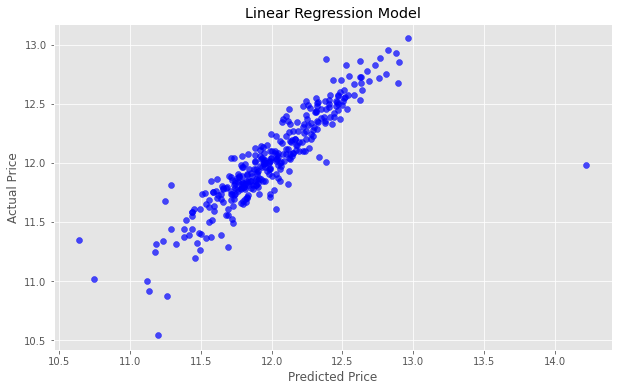

R^2 is: 
 0.7032186090203743
RMSE is: 
 0.04066127331638192


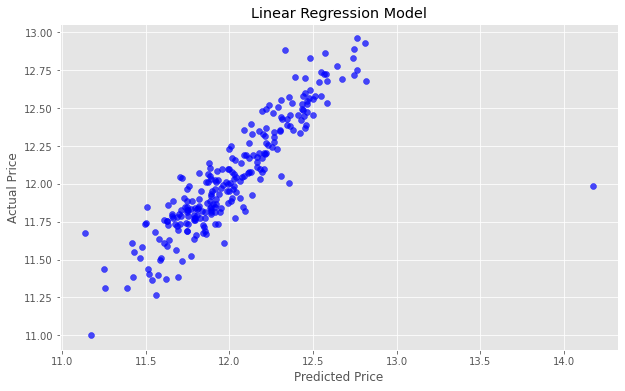

R^2 is: 
 0.7536943026235083
RMSE is: 
 0.03831996489782574


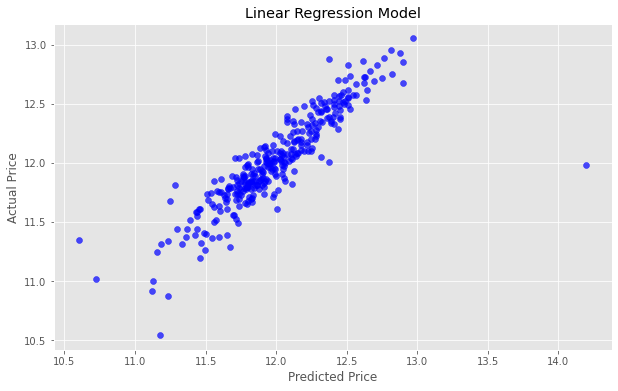

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R^2 is: 
 -4.8193972939901115e+20
RMSE is: 
 1.3511716585622364e+20


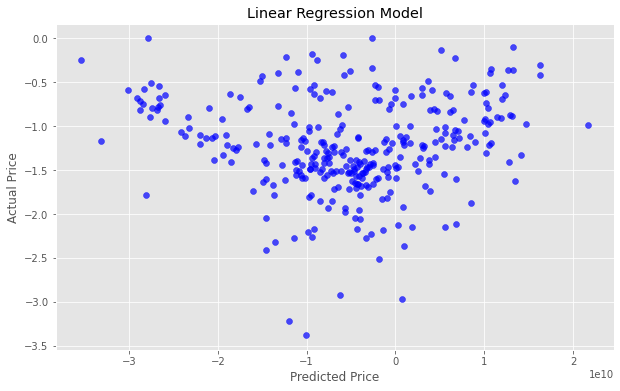

In [111]:
model2(train_mean,test_mean) # Highest score biggest R squared lowest rmse
model2(train_delete_row,test_delete_row) 
model2(train_unique_categ,test_unique_categ) 
model2(train_knn5,test_knn5) # poorest score lowest r squared and biggest rmse

# # Logistic Regression :
# print("logistic Regression: Replacing With Mean")
# logisticRegression(train_mean)
# print("logistic Regression: Deleting Rows")
# logisticRegression(train_delete_row)
# print("logistic Regression: Unique Category")
# logisticRegression(train_unique_categ)
# print("logistic Regression: KNN")
# logisticRegression(train_knn)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R^2 is: 
 0.6951091809824408
RMSE is: 
 0.09205806061706628


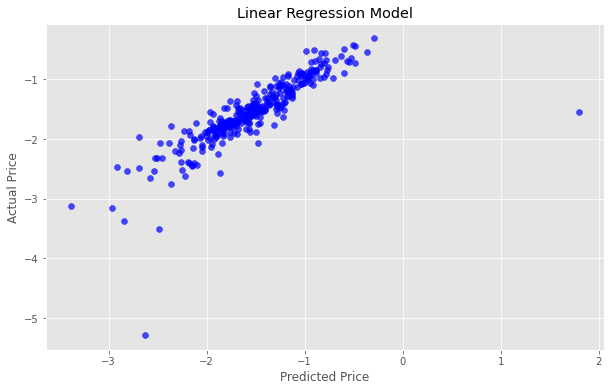

In [112]:
model1(train_knn_full) # poorest score lowest r squared and biggest rmse
